In [1]:
## Import the packages
import numpy as np
from scipy import stats
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### OPGAVE 1

**OPGAVE 1.1**

**What is the advantage of median over mean?**

If our data is highly skewed, the median can give a better indication of typical values of a statistic than the mean i.e. way better representative of the data. Furthermore, if there are outliers in data they affect mean not the median. However, for a perfectly normal distribution the mean and median will be the same value. For normally distributed data the mean is generally preferable especially for statistical tests. 

**OPGAVE 1.2** 

**It is often said that a neural network in ML is a "black box". Why? 
Can you give an example of an ML algorithm that is not "black box" and why it is not?**

The terminology of “black box” in ML is not related to the level of expertise of model developer or user but to the extent that the functions of ML algorithm can be explained and interpreted. For example, logistic regression is a weighted linear combination of the features and so features with higher weights are more important to the prediction task compared to those are not weighted highly. This simple logic translates into the model class assignments. Therefore, it is straightforward to explain why the algorithm assigns a certain observation to class A instead of B. Model interpretability is also true for other algorithms such as K nearest neighborhood classifier (i.e. distance/dissimilarity) or decision tree classifier (i.e. split based on Gini or entropy criterion). When it comes to neural networks, we might know how they learn but we cannot grasp and fully undestand the functions that are modeled by training neural networks. More specifically, we know the model is some non-linear combination of some neurons, each of which is some non-linear combination of some other neurons, but it is almost impossible to explain what each neuron is doing. Therefore, neural network is usually described as black box. 

**OPGAVE 1.3**

**You have been given a regular classification task by a customer with some data and associated label values that you should be able to predict on future data. 
However, it is important for the customer that the algorithm is quite accurate and your pre-trained algorithm does not quite hit the expected precision. 
The customer will, therefore, accept that the algorithm only makes predictions at some data points and skips others, in turn increasing the accuracy 
of the predictions being made. How can this be solved?**

It is not a clear question to me. If I understood correctly fixing different prediction threshold can be an option. If the dataset has the problem of imbalanced classes, using re-sampling techniques and then training model on the resampled dataset can be helpful. Moreover, if imbalanced dataset is the case, ensemble learning can be considered to improve ML results. 

**OPGAVE 1.4**

**Your company has introduced some new software that is supposed to streamline working hours on typical tasks. 
You have been asked to check if the new software has had an effect on working time. You are given 2 data sets, each of which is just a list of total time spent on solving tasks. One contains times from before the new software was put into use and the other is from after. You decide to use a t-test.**

- What assumptions have you made about data?

**We assume from here that the software HAS a positive effect on working time, the question is just whether we can show this based on the 2 data sets. Will it be easier or harder to show significant difference between the two sets if:** 
- The number of samples in each set increases?
- The internal variance in each set increases?
- The respective average values in each dataset are further apart? 
- What does the p-value mean in a t-test?

There are two main assumptions for conducting two sample t-test: 

- 1) data must be randomly sampled from the population of interest. 
- 2) data are normally distributed.

**Increasing sample size and t-test:** 

For the situation of unequal variances, t-statistic = (mu1 - mu2)/(s1^2/n1 + s2^2/n2)^0.5 where mu is mean and s is standard deviation. If means and variances do not change, as sample size increases, t-statistic tend to increase i.e. as denominator decreases, the value of the fraction increases. By increasing t-statistic p-value tends to become smaller. At 95% confidence interval, p-value smaller than 0.05 indicates strong evidence against the null hypothesis, so we reject the null hypothesis proving that the mean of the two distributions are different and statistically significant.

**Increasing internal variance in each set and t-test:** 

As internal variance in each set increases, the denominator of the function increases, which makes t-statistic smaller and accordingly p-value tends to become larger. 

**Increasing difference between means and t-test:** 

As difference between means increases, the numerator of the t-statistic function increases resulting in an increase in the value of t-statitic and accordingly p-value tends to become smaller. 

**What does the p-value mean in a t-test?** 

In layman's terms, a p-value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. As mentioned earlier, the null hypothesis in a t-test assumes that the difference between the two populations means is equal to zero.

In [11]:
## t-test using python and numpy
## Define 2 random distributions
#Sample Size
N = 100
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.normal(2,1,N)
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.normal(0,1,N)

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
print("var_a :", var_a)
print("var_b :", var_b)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))


var_a : 0.8905704967362076
var_b : 1.188037639779912
t = 14.38185370511119
p = 0.0


### OPGAVE 2

You work in a pharmaceutical company that has developed a drug for a particular disease. The problem, however, is that the drug works best as a preventative, and patients typically receive treatment late. Therefore, one would like to be able to predict whether a patient has an increased risk of getting the disease so that one can get it in advance. They have collected some data on a number of patients (with permission) so that you can investigate if you can use ML to make predictions. They have not yet collected information on which patients have had the disease, so there is no label column in the data. To begin with, therefore, simply analyze the data and assess its quality and suitability. All columns are potentially related to the disease, but there are some data issues.

**OPGAVE 2.1** 

**What challenges do you see with data? List all the problems that you can find in the data. What can be done to mitigate the quality problems. How would you clean the data?**

**1- Missing data:** There are 800 missing observations out of 1000 for "blood_pressure_systolic". It is almost impossible to retrive them using conventional methods for handling missing data. I prefer to disregard "blood_pressure_systolic" to enter for any data analysis. 

**2- Outlier detection:** 8 observations (12, 160, 163, 460, 822, 481 and 699) were detected as outliers using Tukey method. They should be deleted.

**3- Mistakes in data:** There are five negative observations in "age" column (87, 97, 644, 739 and 991) which entered in dataset by mistake. They should be removed from the dataset.

There are five observations in "weight_kg" column (267, 291, 323, 544 and 571) larger than 800. For human being thses values do not make sense. They should also be deleted.

**4- Correlation between features:** "height_cm" and "height_ft" are the same but with differnt units. Only one of them should be included in data analysis. In case of building regression model, "BMI" and "height" should not be established as predictors together as they are highly correlated. 

In [12]:
## convert text file into matrix
def file2matrix(filename , delimeter="\t", index_y = None):
    
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """
    
    fr = open(filename)
    colName = list(fr.readline().strip().split(delimeter)) 
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines()[1:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [13]:
file = "opgave2_df.txt"

In [4]:
colName, returnMatX, _ = file2matrix(file , delimeter=",")

In [5]:
## missing values
df = pd.DataFrame(returnMatX, columns= colName )
df.isna().sum()

age                              0
weight_kg                        0
height_cm                        0
height_ft                        0
cholesterol_total_mg_per_dl      0
BMI                              0
blood_pressure_systolic        800
resting_heart_rate               0
VO2max                           0
dtype: int64

In [6]:
## deleting "blood_pressure_systolic" from the dataframe
df_new = df.drop(colName[6], axis=1)

In [14]:
## correlation between features using Pearson method
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,weight_kg,height_cm,height_ft,cholesterol_total_mg_per_dl,BMI,resting_heart_rate,VO2max
age,1,-0.0222155,0.0141012,0.0141012,0.0244587,-0.011004,0.00835188,0.0141821
weight_kg,-0.0222155,1,-0.018697,-0.018697,0.00317639,0.0855429,-0.00874034,-0.00183244
height_cm,0.0141012,-0.018697,1,1,-0.00580328,-0.764766,0.0381262,-0.00457477
height_ft,0.0141012,-0.018697,1,1,-0.00580328,-0.764766,0.0381262,-0.00457477
cholesterol_total_mg_per_dl,0.0244587,0.00317639,-0.00580328,-0.00580328,1,0.0103474,0.0128117,0.0167966
BMI,-0.011004,0.0855429,-0.764766,-0.764766,0.0103474,1,-0.0354146,0.0385753
resting_heart_rate,0.00835188,-0.00874034,0.0381262,0.0381262,0.0128117,-0.0354146,1,-6.80601e-05
VO2max,0.0141821,-0.00183244,-0.00457477,-0.00457477,0.0167966,0.0385753,-6.80601e-05,1


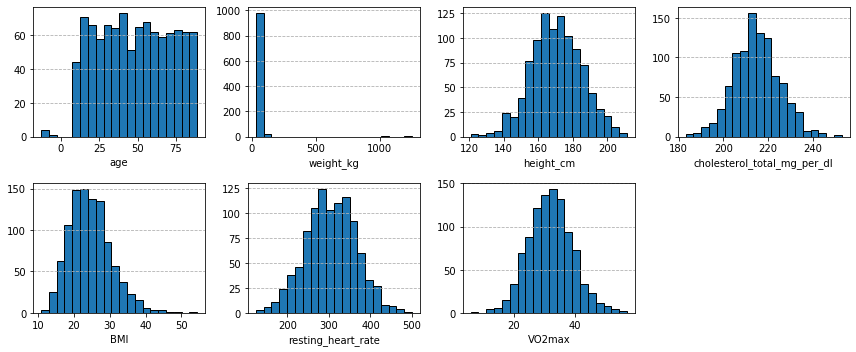

In [15]:
## histogram
ColNames = ["age", "weight_kg", "height_cm", "cholesterol_total_mg_per_dl", 
           "BMI", "resting_heart_rate", "VO2max"]

plt.figure(figsize=(12,5))
i = 1
for ColName in ColNames:
    plt.subplot(2, 4, i)
    plt.hist(df_new[ColName], edgecolor ="k", bins=20)
    plt.xlabel(ColName)
    plt.grid(linestyle="--", axis="y")
    plt.tight_layout()
    i+=1  

In [16]:
# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [18]:
## detecting outliers in the dataframe
newColName = colName[:6]+colName[7:]
Outliers_to_drop = detect_outliers(df_new,1, newColName)
indexOutliers = list(df_new.iloc[Outliers_to_drop,:].index)
indexOutliers

[822, 12, 160, 163, 460, 481, 667, 699]

**OPGAVE 2.2**

**You need to shorten the data set to the columns you think may help to make predictions with ML algorithms.     
Which columns do you want to keep and which ones you want to throw away and why?**

As I explained above, I will throw away "blood_pressure_systolic" because of 800 missing values and "height_ft" to avoid duplication. I will keep the rest for future analysis. 

**OPGAVE 2.3**

**The drug has no side effects, so it is not the great accident if healthy patients are treated with the drug. Therefore, there is some tolerance to false positives (FP) in predictions. On the other hand, it is worse if an algorithm makes a false negative (UN), as a patient could be treated in time but has not been. 
How can this preference be thought into the algorithm development?**

For building a predictive classification model it is important to visualize the trade-off between the true positive rate and false positive rate using different probability thresholds. Because the default value of 0.5 might not address the objectives of predictive analysis. For example, in case of different cost of false positives and false negatives, ROC curves are very helpful to arrive at a threshold that minimizes the mis-classification cost.

Different threshold rates will change the true positive, true negative, false positive, and false negative rates. 
In general, with lower threshold, false positive test results will increase while with higher threshold, false negative test results increase. My final answer to the question is that, since there is no tolerance for false negative we should lower the treshhold even if that results in more false positive.


**OPGAVE 2.4**

**Describe some different performance targets for binary classification algorithms.     
If there is a very uneven distribution of the two categories, what considerations should be made regarding performance goals?**

(1) Classification accuracy/error is the basic evaluation metric to measure the performance of  model. Accuracy is the ratio of correct predictions to total predictions made. 

(2) ROC Curves and (3) Precision-Recall curves are two diagnostic tools to interpret  probabilistic forecast for classification predictive modeling problems. ROC curves are appropriate when the observations are balanced between each class, whereas Precision-Recall curves are appropriate where your data has strong class imbalance.

ROC Curves is plotted with True Positive Rates (TPR) (also called recall or sinsitivity) against False Positive Rates FPR) for all possible threshold values between 0 and 1. The area under a ROC curve (AUC) is used as a summary of the model performance since it measures the level of separability between classes. An excellent model has AUC near to the 1 and a poor model has AUC near to the 0. For example AUC of 0.7 means there is 70% chance that model will be able to distinguish between positive class and negative class. 

Precision-Recall curves plot TPR (here called Recall) and Positive Predictive Value (PPV) (here called Precision) for all possible thresholds. Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class. Two other scores are also important in Precision-Recall curves. F1 score which is a function of Precision and Recall summarizes model performance for a specific probability threshold (e.g. 0.5) while AUC summarizes the performance of a model across thresholds.

### OPGAVE 3

A customer would like to use ML to optimize some processes, and you have been given a dataset that you need to analyze to clarify whether you can use ML algorithms to make certain predictions.

**OPGAVE 3.1**

**The customer would like algorithms to be able to predict the 3 label columns on future data (label1, label2, label3), but you suspect this will not be necessary as you think the 3 labels are deeply correlated.**

**Can you find concrete correlations between the label values? Would the task be solved by making only one algorithm that predicts one of the label values, after which the other labels can be derived?
If so, which label should be predicted by an algorithm and which can be deduced from it?**

As stated, the three labels are categorical. Therefore, we should search for categorical correlation or dependency not the Pearson/Spearman test since they are not normally distributed. Chi-Squared test of independence can be used to prove whether two categorical variables are independent.

If we assume that the three labels are correlated/dependent, only one of them is needed, as the target variable, to train the model. It is more appropriate to incorporate label2 since it looks continuous and includes more information. By including either lable1 or label3 instead of label2, we would eliminate a part of the variation of values. Note that for building the predictive model, label2 should not be treated as categorical variable, it is apparently continuous.

**OPGAVE 3.2**

**What type of supervised learning would be appropriate to predict the selected label column in the previous task and why?
What performance measures can be used for this type of algorithm? 
Name a few different performance goals and describe how they are different.**

Lable2 is selected as the target variable. As mentioned above, it is considered as a continuous variable not categorical. Hence, it is a regression prediction problem. Gaussian regression, decision tree regressor and KNN regressor are some examples of possible algorithms. 

For regression, the most popular performance measures are R squared (R2) and the root mean squared error (RMSE). 

R2 is proportion of variation in the outcome that is explained by the predictor variables. It corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R2, the better the model.

RMSE measures the average error performed by the model in predicting the outcome for an observation. The lower the RMSE, the better the model.

**OPGAVE 3.3**

**You have set out to test a lot of different machine learning algorithms, to find the best one to predict the selected label column. You divide the data into 2 parts, one part for training and one part for testing the algorithm's performance. After training a lot of different algorithms on the training part of the data, you will find the algorithm that had the highest score on the test part of the data,and report this algorithm and the associated score to the customer. 
What mistake did you make and why is it a mistake?**

AS mentioned above, the prediction of label2 is not a classification problem since there are 1000 unique values out of 1000 observations. Therefore, it is a regression problem not a classification. 

**OPGAVE 3.4**

**Train an algorithm to predict the selected label. How high can you get the precision? What algorithm did you use and why? Upload your code in a file along with other documents (resume, etc.).**

To answer this question, label3 which includes 3 classes is selected. This is a multi-class classification problem and I applied four different ML algorithms such as multinomial logistic regression, decision tree, random forest and Knn classifiers. 

The class distributions are not represented equally. Therfore, I face the issue of class imbalance. Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. To deal with this problem, the training dataset were randomly resampled to improve the model performance. 

The results show that the logistic regression provided better predictive performance in terms of precision, recall, F1-score and AUC. The logistic regression perfoms very well even without resampling. With the help of undersampling technique some of the classification metrics icreased while others decreased. However, it is not significant. It is worth mentioning that undersampling were used instaed of oversampling in order to avoid the problem of overfitting.

Please refere to my Python code attached.

In [19]:
file = "opgave3_df.txt"
colName, returnMatX, classLabelVector = file2matrix(file , delimeter=",", index_y=-1)

In [20]:
## create dataframe
df = pd.DataFrame(returnMatX, columns= colName[:-1] )

In [22]:
## encoding target variable
label3 = []
for x in classLabelVector:
    if x == 'category_1': label3.append(0)
    elif x == 'category_2': label3.append(1)
    else: label3.append(2)

df["label3"] = label3

In [23]:
## missing values
print(df.isnull().sum())

col1      0
col2      0
col3      0
col4      0
label1    0
label2    0
label3    0
dtype: int64


In [24]:
## class distribution
df["label3"].value_counts()

1    683
2    187
0    130
Name: label3, dtype: int64

Part 1: training model with imbalanced classes 

In [33]:
## determine the target and predictors 
y = df.label3
X = df.iloc[:,:4]

## data standardization
colMean = np.mean(X,0)
colStd = np.std(X,0)
X_scale =(X-colMean)/colStd

## split our data as train and test
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33, random_state=10)

optimum K for KNN is 14.


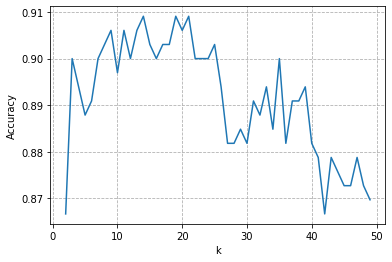

In [34]:
## finding the optimal k for KNN 
accuracy=[]
for k in range(2,50):
    # Fit Knn classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    knn.fit(X_train,y_train)
    ind=accuracy_score(y_test, knn.predict(X_test))
    accuracy.append(ind)

opt_k=np.where(accuracy==np.max(accuracy))[0][0] + 2
print("optimum K for KNN is %d."%opt_k)
plt.plot(range(2,50),accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(linestyle="--");

In [35]:
## Receiver operating characteristic (ROC) plot
def ROC (tpr,fpr,roc_auc):
    plt.plot(tpr, fpr, color='r',label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    plt.xticks(np.arange(0,1.1,.1)); plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.grid()
    
## ROC plot for multi-class classification    
def ROC_multiClass(classifier, n_classes, X_train,y_train,X_test, y_test):
    y_score = classifier.fit(X_train,y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        tpr[i], fpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(tpr[i], fpr[i])
    i = 0
    plt.figure(figsize=(12,3))
    for i in range(n_classes):
        plt.subplot(1, n_classes, i+1)
        ROC(tpr[i],fpr[i],roc_auc[i])
        plt.tight_layout()
        i+=1   

In [36]:
opt_k = opt_k
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(multi_class="multinomial", max_iter=1000, solver='lbfgs'),
    KNeighborsClassifier(opt_k)]

classifiers_names=["Decision Tree: \n", "RandomForest: \n","Logistic Regression: \n", "K Nearest Neighbors: \n"]

Decision Tree: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.89      0.90      0.90       234
           2       0.77      0.72      0.74        64

    accuracy                           0.85       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.85      0.85      0.85       330



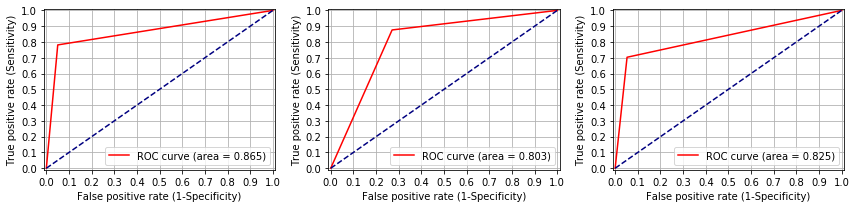

---------------------------------------------------------
RandomForest: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.91      0.95      0.93       234
           2       0.89      0.73      0.80        64

    accuracy                           0.89       330
   macro avg       0.87      0.83      0.85       330
weighted avg       0.89      0.89      0.89       330



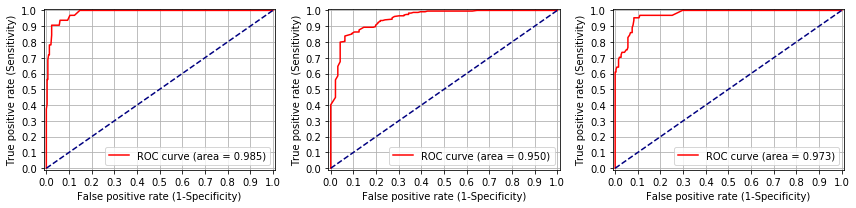

---------------------------------------------------------
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.96      0.97      0.96       234
           2       0.95      0.89      0.92        64

    accuracy                           0.95       330
   macro avg       0.93      0.92      0.93       330
weighted avg       0.95      0.95      0.95       330



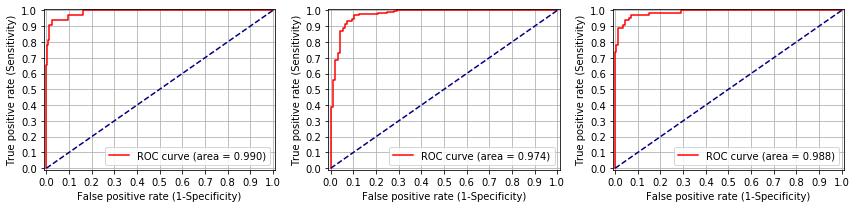

---------------------------------------------------------
K Nearest Neighbors: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.91      0.97      0.94       234
           2       0.94      0.77      0.84        64

    accuracy                           0.91       330
   macro avg       0.90      0.83      0.86       330
weighted avg       0.91      0.91      0.91       330



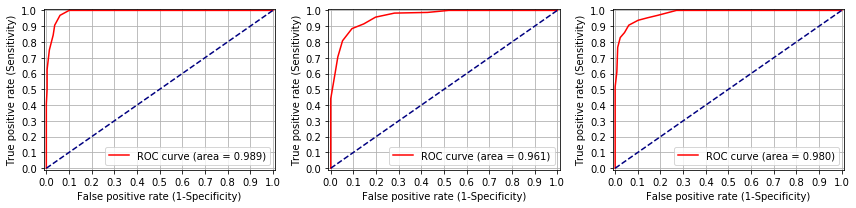

---------------------------------------------------------


In [37]:
n_classes = len(set(y_test))
i=0
for classifier in classifiers:
    model = classifier
    model.fit(X_train,y_train)
    # print(classifier)
    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)
    ROC_multiClass(classifier, n_classes, X_train,y_train,X_test, y_test)
    plt.show()    
    print("---------------------------------------------------------")
    i=i+1

Part 2: balancing data for greater performance

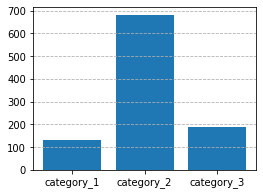

In [31]:
label = ["category_1", "category_2", "category_3"]
## class distribution
height = [130, 683, 187]
plt.figure(figsize=(4,3))
plt.bar(label,height)
plt.grid(linestyle="--", axis = "y");

In [38]:
## underSampling
# Subset only category_1
zeroOnly = df.loc[df["label3"] == 0]

# sample category_2, category_3 to be the same number as there are category_1
oneOnly = df.loc[df["label3"] == 1].sample(len(zeroOnly), random_state=10)
twoOnly = df.loc[df["label3"] == 2].sample(len(zeroOnly), random_state=10)

# concatenate the dataframes 
balancedDf = pd.concat([zeroOnly, oneOnly, twoOnly])

In [39]:
## Determine target and predictors 
y = balancedDf.label3
X = balancedDf.iloc[:,:4]

colMean = np.mean(X,0)
colStd = np.std(X,0)
X_scale =(X-colMean)/colStd

## Split our data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33, random_state=10)

In [40]:
opt_k = opt_k
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(multi_class="multinomial", max_iter=1000, solver='lbfgs'),
    KNeighborsClassifier(opt_k)]

classifiers_names=["Decision Tree: \n",
                   "RandomForest: \n",
                   "Logistic Regression: \n",
                   "K Nearest Neighbors: \n"]

Decision Tree: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.67      0.72      0.69        46
           2       0.74      0.78      0.76        36

    accuracy                           0.78       129
   macro avg       0.78      0.77      0.78       129
weighted avg       0.78      0.78      0.78       129



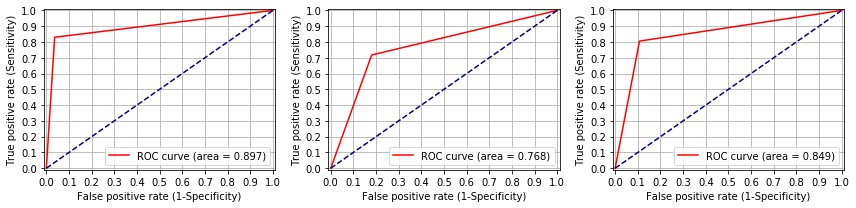

---------------------------------------------------------
RandomForest: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.78      0.78      0.78        46
           2       0.86      0.86      0.86        36

    accuracy                           0.84       129
   macro avg       0.85      0.85      0.85       129
weighted avg       0.84      0.84      0.84       129



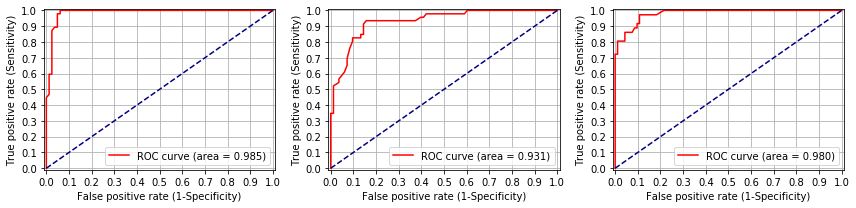

---------------------------------------------------------
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.95      0.85      0.90        46
           2       0.88      0.97      0.92        36

    accuracy                           0.93       129
   macro avg       0.93      0.93      0.93       129
weighted avg       0.93      0.93      0.93       129



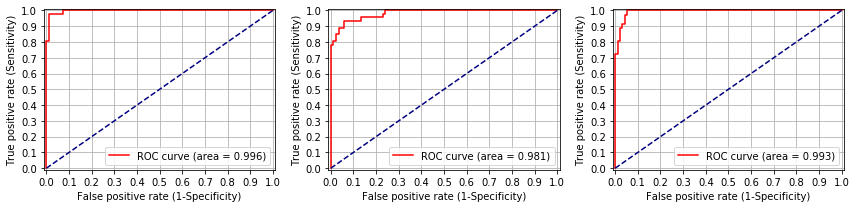

---------------------------------------------------------
K Nearest Neighbors: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        47
           1       0.94      0.72      0.81        46
           2       0.85      0.97      0.91        36

    accuracy                           0.88       129
   macro avg       0.89      0.89      0.88       129
weighted avg       0.89      0.88      0.88       129



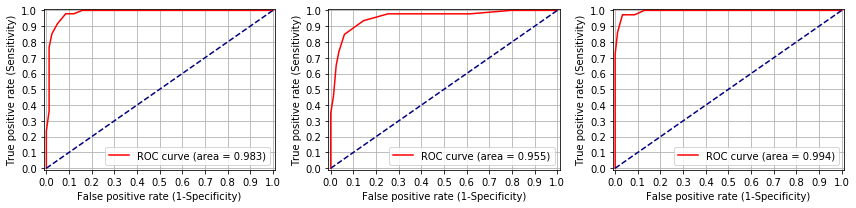

---------------------------------------------------------


In [41]:
n_classes = len(set(y_test))
i=0
for classifier in classifiers:
    model = classifier
    model.fit(X_train,y_train)
    # print(classifier)
    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)
    ROC_multiClass(classifier, n_classes, X_train,y_train,X_test, y_test)
    plt.show()    
    print("---------------------------------------------------------")
    i=i+1

### OPGAVE 4

The 2 data sets contain data on outbound transactions for companies. The first includes the transaction ID "id", the company ID "cvr" and the amount of the transaction "amount". The second contains the transaction ID "id" and the type of transaction "t_type". You need to write some code for each of the following tasks ...

**OPGAVE 4.1**

**Write some code that merges the 2 data sets into one, so that you only keep rows where you know both "cvr" and "t_type" values.**

First, I created a function namely file2matrix() which takes a .txt file and returns a list of column names and a matrix of features. Then by using pandas library I converted the two dataset into dataframe. "id" is common between the two dataframes. Therefore, they are merged on "id" using merge() function i.e. pd.merge(df1, df2, on = "id", how="inner"). The merged dataframe includes "id", "cvr", "beloeb" and "t_type".

In [42]:
file = "opgave4_df1.txt"
colName, returnMatX, classLabelVector = file2matrix(file , delimeter=",")
df1 = pd.DataFrame(returnMatX, columns= colName)
df1.head()

,id,cvr,beloeb
0,0.0,95.0,3557.0
1,1.0,85.0,1842.0
2,2.0,162.0,7096.0
3,3.0,94.0,4276.0
4,4.0,173.0,5658.0


In [43]:
file = "opgave4_df2.txt"
colName, returnMatX, classLabelVector = file2matrix(file , delimeter=",", index_y = -1)
df2 = pd.DataFrame([returnMatX.flatten(),np.array(classLabelVector)]).T.set_axis(colName,1, inplace=False)
df2.head()

,id,t_type
0,2031,E
1,1968,E
2,2207,B
3,2560,B
4,1666,D


In [44]:
mergedDf = pd.merge(df1,df2,on="id",how="inner")
mergedDf.head()

,id,cvr,beloeb,t_type
0,0,95.0,3557.0,D
1,2,162.0,7096.0,D
2,7,59.0,9043.0,A
3,10,162.0,7228.0,C
4,11,15.0,3468.0,A


**OPGAVE 4.2**

**Write some code that combines the 2 data sets into one, so that you keep all rows where you only know at least one of the values "cvr" or "t_type"**

This is not a clear question to me. I merged the two dataframes on "id" which is common between them. Refere to OPGAVE 4.1

**OPGAVE 4.3**

**Write some code that combines the 2 data sets into one, so that you keep all rows where you know exactly one of the values "cvr" or "t_type", but not both.**

This is not a clear question to me. I merged the two dataframes on "id" which is common between them. Refere to OPGAVE 4.1

**OPGAVE 4.4**

**In this task, you must start from the joined data set that you calculated in the first part of the task. Write some code that calculates the total amount for each company.**

In [45]:
# method 1
totalBeloeb = mergedDf.groupby("cvr").sum().reset_index()
print("Method 1")
print(totalBeloeb.head())

# method 2
uniqeValues = list(set(mergedDf.cvr))
dic = dict()
for val in uniqeValues:
    dic[val] = mergedDf[mergedDf["cvr"] == val].beloeb.sum()
totalBeloeb = pd.DataFrame(dic.items(), columns=['cvr', 'beloeb'])
print("Method 2")
print(totalBeloeb.head())

Method 1
   cvr   beloeb
0  1.0  11318.0
1  2.0  13331.0
2  3.0  16039.0
3  6.0   5440.0
4  7.0  13086.0
Method 2
   cvr   beloeb
0  1.0  11318.0
1  2.0  13331.0
2  3.0  16039.0
3  6.0   5440.0
4  7.0  13086.0


**OPGAVE 4.5**

**In this assignment, you must use the joined data set you calculated in the first part of the assignment. Write some code that calculates a new column for the dataset. The column should indicate how rare the given type of transaction is for a given business.** 

**Example: A company has a total of 10 transactions. 7 are of type A and 3 are of type B. The 7 rows in the data set which are of type A and which belong to the given enterprise 
must therefore have 7/10 = 0.7 in the new column. Each of the 3 rows of type B must have 3/10 = 0.3 in the new column.**

In [46]:
# all unique values of company ids 
uniqValues = list(set(mergedDf["cvr"]))
finalDic = dict()

i=0
for uniqValue in uniqValues:
    subDf = mergedDf[mergedDf["cvr"] == uniqValue]
    dic = dict()
    total = len(subDf)
    for x in subDf["t_type"]:
        dic[x] = dic.get(x,0)+1
    # probability 
    dic = {k: round(v / total, 2) for k, v in dic.items()} 
    finalDic[uniqValue] = dic   
    i+=1

# create new column 
mergedDf["new"] = 0
i=0
for x, val in zip(mergedDf["cvr"], mergedDf["t_type"]):
    mergedDf.iloc[i,4] = finalDic[x][val]
    i+=1

# sort the dataframe by column "cvr"     
mergedDf = mergedDf.sort_values(by=['cvr'])

In [47]:
mergedDf.sort_values(by=["cvr"]).head(12)

,id,cvr,beloeb,t_type,new
45,113,1.0,1676.0,D,0.25
137,427,1.0,5372.0,A,0.50
203,610,1.0,2942.0,A,0.50
177,539,1.0,1328.0,B,0.25
300,917,2.0,3623.0,B,0.50
50,134,2.0,9708.0,D,0.50
178,542,3.0,7249.0,C,0.50
231,707,3.0,8790.0,D,0.50
107,329,6.0,5440.0,C,1.00
268,801,7.0,3048.0,E,0.67
